In [1]:
# %matplotlib ipympl
import h5py 
import numpy as np 
import matplotlib.pyplot as plt 
import sys
# import pandas as pd
import tables
import nexusformat.nexus as nx
from matplotlib.colors import LogNorm
from matplotlib.transforms import Affine2D

In [2]:
# neutron events
filename_hits = "/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/With_mount/Neutron/neutron_hits_new.h5"
# neutron_events_nhit_more_30 = "/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/With_mount/Neutron_with_star_target/nhit=overnight_5.h5"

# filename_events_Dscale1= "/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/ambient_light/navitarlensminclustersize_1_dscale1.h5"
# #Co event
Co_events = "/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/With_mount/Co/Co_hits_new.h5"
# Co_events_nhit_more_1 = "/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/Co60/Co_nhit_morethan1.h5"

# # Back ground
# Back_events_nhit_more_30 = "/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/Background/Background_nhit_morethan30.h5"
# Back_events_nhit_more_1 = "/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/Background/Background_nhit_morethan1.h5"


# # Cs event
Cs_events_nhit_events="/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/With_mount/Cs/Cs_hits_new.h5"
# Cs_events_nhit_more_1="/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/Cs137/Cs_nhits_morethan1.h5"

# # Am event
# Am_events_nhit_more_45="/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/With_mount/Am/Am_nhits_45.h5"
# Am_events_nhit_more_1="/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/Am/Am_nhit_morethan1.h5"

# # After grow
Aftergrow_events = "/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/aftergrow/aftergrow_hits_new.h5"
# Aftergrow_events_nhit_more_1 = "/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/aftergrow/aftergrow_nhit_morethan1.h5"


# 0.3 mmthick
#Co event
# Co_events_1 = "/Users/fumiaki/Documents/ORNL/Research/Sophyread/mcpevent2hist-main/sophiread/build/data/0p3thickness/Co60/Co60_events.h5"


# Cs event
# filename_events_3 = "/Users/fumiaki/Documents/ORNL/Research/Sophyread/mcpevent2hist-main/sophiread/build/data/0p3thickness/Cs137/Cs137_events.h5"

# Am event
# 

filename_events_4 = "/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/With_mount/Am/Am_hits_new.h5"

# # neutron events
# filename_events = "/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/Neutron/neutron.h5"
# # previous one
# filename_events_1 = "/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/Neutron/neutron_spi_50000ns.h5"

# filename_events_2 = "/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/Neutron/neutron_spi_5000ns.h5"

# Background 
back_events_5="/Users/fumiaki/Documents/ORNL/Research/PTX3_Analysis/Data/0p3thickness/With_mount/Background/back_hits_new.h5"








# f = nx.nxload(neutron_events_nhit_more_30)
# print(f.tree)

# ff = nx.nxload(filename_hits)
# print(ff.tree)

In [3]:
with h5py.File(filename_hits) as h5f:
    x = h5f["hits/x"][:]
    y = h5f["hits/y"][:]
    toa_ns = h5f["hits/toa_ns"][:]
    tof_ns = h5f["hits/tof_ns"][:]
    tot_ns = h5f["hits/tot_ns"][:]
    ftoa_ns = h5f["hits/ftoa_ns"][:]
    spidertime_ns = h5f["hits/spidertime_ns"][:]
    labels = h5f['hits/labels'][:]
    
print(f"Number of hits: {len(x)/1e6} MHits")
print(f"Acquisition time: {max(spidertime_ns)*1e-9 - min(spidertime_ns)*1e-9} s")
print(f"Hit rate: {round(len(x)/1e6/(max(spidertime_ns)*1e-9),3)} MHits/s")


/Users/fumiaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


Number of hits: 36.465047 MHits
Acquisition time: 4871.344824625001 s
Hit rate: 0.007 MHits/s


(array([  0.,  50., 100., ..., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

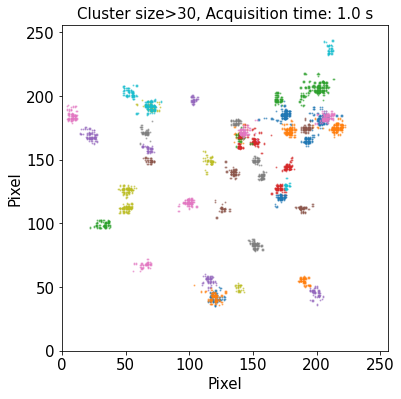

In [34]:

# Set the time frame window 
frame_exposure = 1e9 # in ns 
num_frames = 1
acquisition_time = num_frames*frame_exposure
acquisition_time_s=acquisition_time/1000000000

start_time = spidertime_ns[0+500000*10]
time_frame = (start_time <= spidertime_ns) & (spidertime_ns <= start_time + acquisition_time)
slice_x, slice_y, slice_labels = x[time_frame],y[time_frame],labels[time_frame]
unique_labels = np.unique(slice_labels)

# visualize the selected time frame 
min_cluster_size = 30

# visualize the selected time frame 
fig, ax = plt.subplots(figsize=(8,6))
numberofcluster=0
for l in unique_labels:
    cond = (slice_labels == l)
    x_, y_ = slice_x[cond],slice_y[cond]
    if len(y_) >= min_cluster_size: # len(y_)=nhits
        numberofcluster=numberofcluster+1
        ax.scatter(x_-256,y_,alpha=0.5,s=1)
#         plt.annotate(len(x_), 
#              (np.mean(x_),np.mean(y_)),
#              horizontalalignment='center',
#              verticalalignment='center',
#              size=8, weight='bold',
#              color='black',
#              # backgroundcolor='black',
#             ) 
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_title(f"Cluster size>{min_cluster_size}, Acquisition time: {acquisition_time_s} s", fontsize=Labelsize)
ax.set_xlabel("Pixel", fontsize=Labelsize)
ax.set_ylabel("Pixel", fontsize=Labelsize)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().set_aspect('equal')
plt.xlim([0, 256])
plt.ylim([0, 256])
plt.xticks(fontsize=Labelsize)
plt.yticks(fontsize=Labelsize)

(0.0, 256.0)

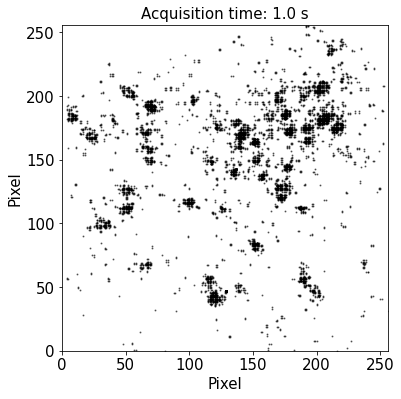

In [31]:
Labelsize=15
# Set the time frame window 
frame_exposure = 1e9 # in ns 
num_frames = 1
acquisition_time = num_frames*frame_exposure
acquisition_time_s=acquisition_time/1000000000

start_time = spidertime_ns[0+500000*10]
time_frame = (start_time <= spidertime_ns) & (spidertime_ns <= start_time + acquisition_time)
slice_x, slice_y, slice_labels = x[time_frame],y[time_frame],labels[time_frame]
unique_labels = np.unique(slice_labels)

# visualize the selected time frame 
min_cluster_size = 1

# visualize the selected time frame 
fig, ax = plt.subplots(figsize=(8,6))
numberofcluster=0
for l in unique_labels:
    cond = (slice_labels == l)
    x_, y_ = slice_x[cond],slice_y[cond]
    if len(y_) >= min_cluster_size: # len(y_)=nhits
        numberofcluster=numberofcluster+1
        ax.scatter(x_-256,y_,alpha=0.5,s=1, c="black")
#         plt.annotate(len(x_), 
#              (np.mean(x_),np.mean(y_)),
#              horizontalalignment='center',
#              verticalalignment='center',
#              size=8, weight='bold',
#              color='black',
#              # backgroundcolor='black',
#             ) 
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_title(f"Acquisition time: {acquisition_time_s} s", fontsize=Labelsize)
ax.set_xlabel("Pixel", fontsize=Labelsize)
ax.set_ylabel("Pixel", fontsize=Labelsize)
# ax.set_xtick(fontsize=20)
# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().set_aspect('equal')
plt.xlim([0, 256])
plt.xticks(fontsize=Labelsize)
plt.yticks(fontsize=Labelsize)
# plt.title(fontsize=20)
plt.ylim([0, 256])

(array([  0.,  50., 100., ..., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

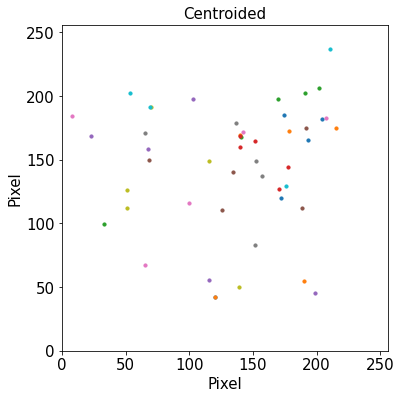

In [35]:
Labelsize=15

# Set the time frame window
frame_exposure = 1e9 # in ns
num_frames = 1
acquisition_time = num_frames*frame_exposure
acquisition_time_s=acquisition_time/1000000000
start_time = spidertime_ns[0+500000*10]
time_frame = (start_time <= spidertime_ns) & (spidertime_ns <= start_time + acquisition_time)
slice_x, slice_y, slice_labels,slice_tot = x[time_frame],y[time_frame],labels[time_frame],tot_ns[time_frame]
unique_labels = np.unique(slice_labels)
# visualize the selected time frame
min_cluster_size = 30
# visualize the selected time frame
fig, ax, = plt.subplots(figsize=(8,6))
numberofcluster=0
for l in unique_labels:
    cond = (slice_labels == l)
    x_, y_,tot_ = slice_x[cond],slice_y[cond],slice_tot[cond]
    x__=0
    y__=0
    tot__=0
    centroided_x=0
    centroided_y=0
#     print(slice_tot[cond])
    if len(y_) >= min_cluster_size: # len(y_)=nhits
        numberofcluster=numberofcluster+1
        plt.annotate(len(x_),
             (np.mean(x_),np.mean(y_)+5),
             horizontalalignment="center",
             verticalalignment="center",
             size=8, weight="bold",
             color="black",
             # backgroundcolor=‘black’,
            )
        x__+= x_*tot_
        y__+= y_*tot_
        tot__+=tot_
        centroided_x=np.sum(x__)/np.sum(tot__)
        centroided_y=np.sum(y__)/np.sum(tot__)
#         print(len(centroided_x))
        ## Calc variance##
        x_variance_=(centroided_x-x_)**2
        y_variance_=(centroided_y-y_)**2
        x_variance=np.sum(x_variance_)/len(x_variance_)
        y_variance=np.sum(y_variance_)/len(y_variance_)
#         plt.annotate(round(x_variance,1),
#              (np.mean(x_)-7,np.mean(y_)+10),
#              horizontalalignment="center",
#              verticalalignment="center",
#              size=8, weight="bold",
#              color="red",
#              # backgroundcolor=‘black’,
#             )
#         plt.annotate(round(y_variance,1),
#              (np.mean(x_)+7,np.mean(y_)+10),
#              horizontalalignment="center",
#              verticalalignment="center",
#              size=8, weight="bold",
#              color="blue",
#              # backgroundcolor=‘black’,
#             )
#         ax.scatter(x_,y_,alpha=0.5,label=f"label={l}, nhits={len(x_)}, centroided point ({round(centroided_x,1)},{round(centroided_y,1)})",s=3)
        ax.scatter(centroided_x-256,centroided_y,alpha=1,s=10)
    ax.set_title("Centroided",fontsize=Labelsize)
    # Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.set_title(f"Number of clusters:{numberofcluster}, Nhits>{min_cluster_size}, Acquisition time: {acquisition_time_s} s”)
ax.set_xlabel("Pixel", fontsize=Labelsize)
ax.set_ylabel("Pixel", fontsize=Labelsize)
# Put a legend to the right of the current axis
# ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.gca().set_aspect("equal")
plt.xlim([0, 256])
plt.ylim([0, 256])
plt.xticks(fontsize=Labelsize)
plt.yticks(fontsize=Labelsize)

In [160]:
len(y_)

1

# Upper limit for nhits

In [161]:
len(nhits)

188352

In [162]:
nhits[1]

99

In [76]:
Min_nhit=45
Max_nhit=140
x_nhit=np.array([])
y_nhit=np.array([])
tot_nhit=np.array([])
nhits_nhit=np.array([])

# Store data which has nhits<Max_nhit

for t in range (len(nhits)):
    if nhits[t]<Max_nhit:
        x_nhit=np.append(x_nhit,x[t])
        y_nhit= np.append(y_nhit,y[t])
        tot_nhit= np.append(tot_nhit,tot[t])
        nhits_nhit= np.append(nhits_nhit,nhits[t])

In [77]:
len(x_nhit)

133999

In [78]:
# with h5py.File(Am_events_nhit_more_45) as h5f:
#     x = h5f["events/x"][:]
#     y = h5f["events/y"][:]
#     tot = h5f["events/tot"][:]
#     nhits = h5f["events/NHits"][:]

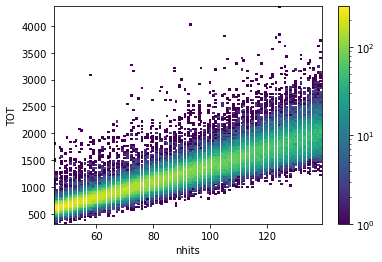

In [79]:
plt.figure()
# _ = plt.hist2d(nhits_nhit, tot_nhit, bins=150, range=np.array([(Min_nhit, Max_nhit), (0, 7000)]),norm=LogNorm())
_ = plt.hist2d(nhits_nhit, tot_nhit, bins=150,norm=LogNorm())

plt.colorbar()
# ax.set_ylabel('Y')
# plt.yscale('log', nonposy='clip')
# plt.legend(loc='upper right')
plt.xlabel("nhits")
plt.ylabel("TOT")
plt.savefig(f'TOT_nhits.png')

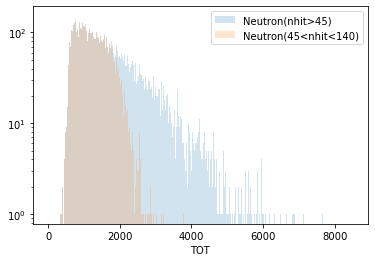

In [32]:
plt.figure()
# _ = plt.hist(totsmore_1, 6500,range=[0, 6500],alpha = 0.2, label='Neutron(nhit>1)' )
_ = plt.hist(tot, 8500,range=[0, 8500],alpha = 0.2, label='Neutron(nhit>45)' )
_ = plt.hist(tot_nhit, 8500,range=[0, 8500],alpha = 0.2, label='Neutron(45<nhit<140)' )

# _ = plt.hist(tot_Cs_events_nhit_more_1, 1500,range=[0, 1500],alpha = 0.2, label='Cs137(nhit>1)' )
# _ = plt.hist(tot_Cs_events_nhit_more_30, 1500,range=[0, 1500],alpha = 0.5, label='Cs137(nhit>30)' )


# _ = plt.hist(tot_Am_events, 1500,range=[0, 1500],alpha = 0.5, label='Am' )
# _ = plt.hist(tot_Aftergrow_events, 1500,range=[0, 1500],alpha = 0.3, label='After glow' )
# _ = plt.hist(tot_Back_events, 1500,range=[0, 1500],alpha = 0.3, label='Background')
# _ = plt.hist(nhits_5, 120,range=[0, 120],alpha = 0.3, label='After glow(16 h later)' )

plt.yscale('log', nonposy='clip')
plt.legend(loc='upper right')
plt.xlabel("TOT")
plt.savefig(f'TOT.png')

# Detector count for each pixel

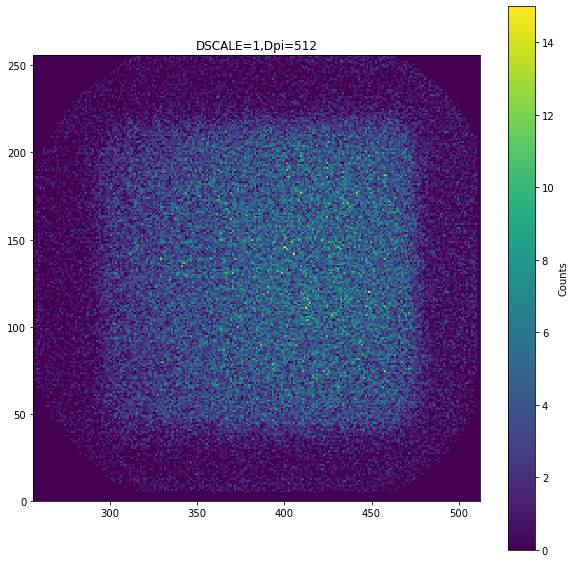

In [57]:
DSCALE = 1
binsize = 256*DSCALE
DPI=512
xedges = np.linspace(binsize, binsize*2, binsize+1)
yedges = np.linspace(0, binsize, binsize+1)

H, xedges, yedges = np.histogram2d(x_nhit*DSCALE, y_nhit*DSCALE, bins=(xedges, yedges))

fig, ax = plt.subplots(figsize=(10,10))

h=ax.imshow(
  H, # same coordinate of experimental setup
#     -np.log(H+1),
    interpolation='nearest',
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap="viridis",  
#      vmin=0,
#      vmax=5
)

fig.colorbar(h,label="Counts")
# f.set_label('# of contacts', rotation=270)
ax.set_title(f"DSCALE={DSCALE},Dpi={DPI}")
fig.savefig(f'detectorcount_dpi{DPI}_DSCALE{DSCALE}.tiff',format="tiff",dpi=DPI)
fig.savefig(f'detectorcount_dpi{DPI}_DSCALE{DSCALE}.png',format="png",dpi=DPI)

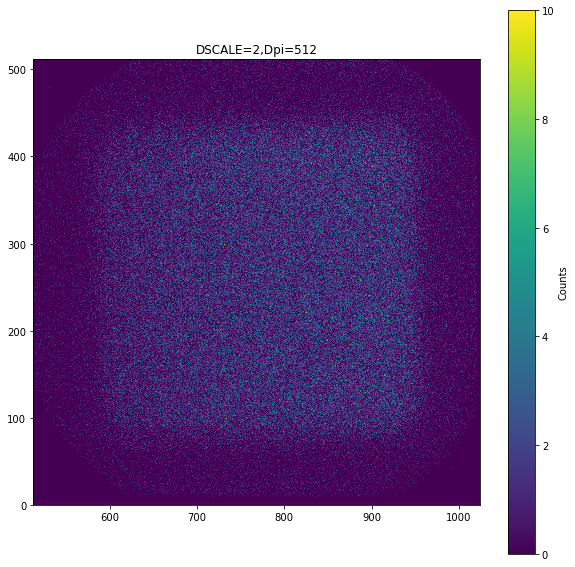

In [280]:
DSCALE = 2
binsize = 256*DSCALE
DPI=512
xedges = np.linspace(binsize, binsize*2, binsize+1)
yedges = np.linspace(0, binsize, binsize+1)

H, xedges, yedges = np.histogram2d(x*DSCALE, y*DSCALE, bins=(xedges, yedges))

fig, ax = plt.subplots(figsize=(10,10))

h=ax.imshow(
  H, # same coordinate of experimental setup
#      -np.log(H+1),
    interpolation='nearest',
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap="viridis",  
#       vmin=1,
#     vmax=3.5
)
fig.colorbar(h,label="Counts")
ax.set_title(f"DSCALE={DSCALE},Dpi={DPI}")
fig.savefig(f'detectorcount_dpi{DPI}_DSCALE{DSCALE}.png',dpi=DPI)

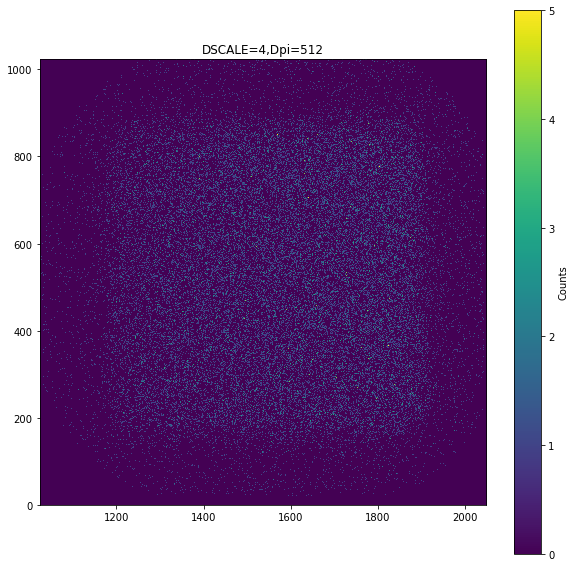

In [281]:
DSCALE = 4
binsize = 256*DSCALE
DPI=512
xedges = np.linspace(binsize, binsize*2, binsize+1)
yedges = np.linspace(0, binsize, binsize+1)

H, xedges, yedges = np.histogram2d(x*DSCALE, y*DSCALE, bins=(xedges, yedges))

fig, ax = plt.subplots(figsize=(10,10))

h=ax.imshow(
  H, # same coordinate of experimental setup
#      -np.log(H+1),
    interpolation='nearest',
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap="viridis",  
#      vmin=0,
#      vmax=2
)
fig.colorbar(h,label="Counts")
ax.set_title(f"DSCALE={DSCALE},Dpi={DPI}")
fig.savefig(f'filename_dpi{DPI}_DSCALE{DSCALE}.png',dpi=DPI)

In [3]:
with h5py.File(neutron_events) as h5f:
#     x = h5f["events/x"][:]
#     y = h5f["events/y"][:]
    tot_neutron_event = h5f["events/tot"][:]

/Users/fumiaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [25]:
with h5py.File(neutron_events_nhit_more_30) as h5f:
#     x = h5f["events/x"][:]
#     y = h5f["events/y"][:]
    tot_neutron_events_nhit_more_30 = h5f["events/tot"][:]

/Users/fumiaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [26]:
with h5py.File(Cs_events_nhit_more_30) as h5f:
#     x = h5f["events/x"][:]
#     y = h5f["events/y"][:]
    tot_Cs_events_nhit_more_30  = h5f["events/tot"][:]
    
with h5py.File(Cs_events_nhit_more_1) as h5f:
#     x = h5f["events/x"][:]
#     y = h5f["events/y"][:]
    tot_Cs_events_nhit_more_1  = h5f["events/tot"][:]

/Users/fumiaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.
/Users/fumiaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


In [27]:
with h5py.File(Am_events) as h5f:
#     x = h5f["events/x"][:]
#     y = h5f["events/y"][:]
    tot_Am_events = h5f["events/tot"][:]

NameError: name 'Am_events' is not defined

In [28]:
with h5py.File(Co_events_nhit_more_1 ) as h5f:
#     x = h5f["events/x"][:]
#     y = h5f["events/y"][:]
    tot_Co_events_nhit_more1 = h5f["events/tot"][:]

/Users/fumiaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [29]:
with h5py.File(Co_events) as h5f:
#     x = h5f["events/x"][:]
#     y = h5f["events/y"][:]
    tot_Co_events = h5f["events/tot"][:]

NameError: name 'Co_events' is not defined

In [40]:
with h5py.File(Back_events_nhit_more_30) as h5f:
#     x = h5f["events/x"][:]
#     y = h5f["events/y"][:]
    tot_Back_events_nhit_more_30 = h5f["events/tot"][:]
#     nhits = h5f["events/NHits"][:]

with h5py.File(Back_events_nhit_more_1) as h5f:
#     x = h5f["events/x"][:]
#     y = h5f["events/y"][:]
    tot_Back_events_nhit_more_1 = h5f["events/tot"][:]

/Users/fumiaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.
/Users/fumiaki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  import sys


Text(0.5, 0, 'TOT')

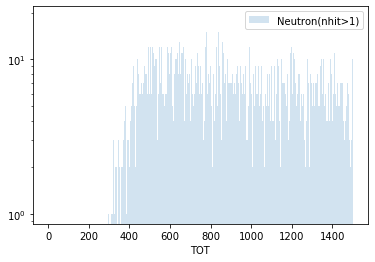

In [4]:
plt.figure()
_ = plt.hist(tot_neutron_event, 1500,range=[0, 1500],alpha = 0.2, label='Neutron(nhit>30)' )
# _ = plt.hist(tot_neutron_events_nhit_more_30, 1500,range=[0, 1500],alpha = 0.2, label='Neutron(nhit>30)' )
# _ = plt.hist(tot_Cs_events_nhit_more_1, 1500,range=[0, 1500],alpha = 0.2, label='Cs137(nhit>1)' )
# _ = plt.hist(tot_Cs_events_nhit_more_30, 1500,range=[0, 1500],alpha = 0.5, label='Cs137(nhit>30)' )


# _ = plt.hist(tot_Am_events, 1500,range=[0, 1500],alpha = 0.5, label='Am' )
# _ = plt.hist(tot_Aftergrow_events, 1500,range=[0, 1500],alpha = 0.3, label='After glow' )
# _ = plt.hist(tot_Back_events, 1500,range=[0, 1500],alpha = 0.3, label='Background')
# _ = plt.hist(nhits_5, 120,range=[0, 120],alpha = 0.3, label='After glow(16 h later)' )

plt.yscale('log', nonposy='clip')
plt.legend(loc='upper right')
plt.xlabel("TOT")

Text(0.5, 0, 'TOT')

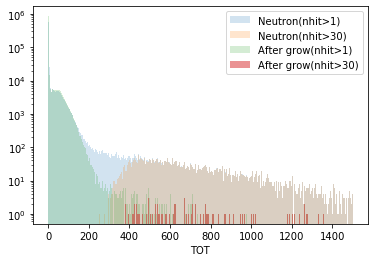

In [39]:
plt.figure()
_ = plt.hist(tot_neutron_event, 1500,range=[0, 1500],alpha = 0.2, label='Neutron(nhit>1)' )
_ = plt.hist(tot_neutron_events_nhit_more_30, 1500,range=[0, 1500],alpha = 0.2, label='Neutron(nhit>30)' )
_ = plt.hist(tot_Aftergrow_nhit_more_1, 1500,range=[0, 1500],alpha = 0.2, label='After grow(nhit>1)' )
_ = plt.hist(tot_Aftergrow_nhit_more_30, 1500,range=[0, 1500],alpha = 0.5, label='After grow(nhit>30)' )


# _ = plt.hist(tot_Am_events, 1500,range=[0, 1500],alpha = 0.5, label='Am' )
# _ = plt.hist(tot_Aftergrow_events, 1500,range=[0, 1500],alpha = 0.3, label='After glow' )
# _ = plt.hist(tot_Back_events, 1500,range=[0, 1500],alpha = 0.3, label='Background')
# _ = plt.hist(nhits_5, 120,range=[0, 120],alpha = 0.3, label='After glow(16 h later)' )

plt.yscale('log', nonposy='clip')
plt.legend(loc='upper right')
plt.xlabel("TOT")

Text(0.5, 0, 'TOT')

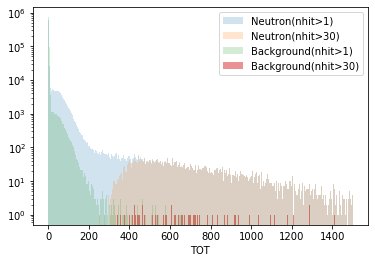

In [41]:
plt.figure()
_ = plt.hist(tot_neutron_event, 1500,range=[0, 1500],alpha = 0.2, label='Neutron(nhit>1)' )
_ = plt.hist(tot_neutron_events_nhit_more_30, 1500,range=[0, 1500],alpha = 0.2, label='Neutron(nhit>30)' )
_ = plt.hist(tot_Back_events_nhit_more_1, 1500,range=[0, 1500],alpha = 0.2, label='Background(nhit>1)' )
_ = plt.hist(tot_Back_events_nhit_more_30, 1500,range=[0, 1500],alpha = 0.5, label='Background(nhit>30)' )


# _ = plt.hist(tot_Am_events, 1500,range=[0, 1500],alpha = 0.5, label='Am' )
# _ = plt.hist(tot_Aftergrow_events, 1500,range=[0, 1500],alpha = 0.3, label='After glow' )
# _ = plt.hist(tot_Back_events, 1500,range=[0, 1500],alpha = 0.3, label='Background')
# _ = plt.hist(nhits_5, 120,range=[0, 120],alpha = 0.3, label='After glow(16 h later)' )

plt.yscale('log', nonposy='clip')
plt.legend(loc='upper right')
plt.xlabel("TOT")

Text(0.5, 0, 'TOT')

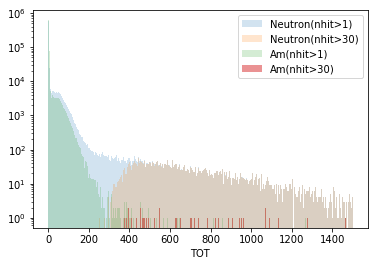

In [34]:
plt.figure()
_ = plt.hist(tot_neutron_event, 1500,range=[0, 1500],alpha = 0.2, label='Neutron(nhit>1)' )
_ = plt.hist(tot_neutron_events_nhit_more_30, 1500,range=[0, 1500],alpha = 0.2, label='Neutron(nhit>30)' )
_ = plt.hist(tot_Am_nhit_more_1 , 1500,range=[0, 1500],alpha = 0.2, label='Am(nhit>1)' )
_ = plt.hist(tot_Am_nhit_more_30, 1500,range=[0, 1500],alpha = 0.5, label='Am(nhit>30)' )


# _ = plt.hist(tot_Am_events, 1500,range=[0, 1500],alpha = 0.5, label='Am' )
# _ = plt.hist(tot_Aftergrow_events, 1500,range=[0, 1500],alpha = 0.3, label='After glow' )
# _ = plt.hist(tot_Back_events, 1500,range=[0, 1500],alpha = 0.3, label='Background')
# _ = plt.hist(nhits_5, 120,range=[0, 120],alpha = 0.3, label='After glow(16 h later)' )

plt.yscale('log', nonposy='clip')
plt.legend(loc='upper right')
plt.xlabel("TOT")

Text(0.5, 0, 'TOT')

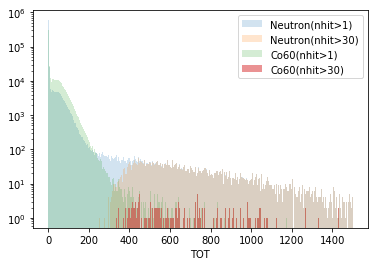

In [32]:
plt.figure()
_ = plt.hist(tot_neutron_event, 1500,range=[0, 1500],alpha = 0.2, label='Neutron(nhit>1)' )
_ = plt.hist(tot_neutron_events_nhit_more_30, 1500,range=[0, 1500],alpha = 0.2, label='Neutron(nhit>30)' )
_ = plt.hist(tot_Co_events_nhit_more1, 1500,range=[0, 1500],alpha = 0.2, label='Co60(nhit>1)' )
_ = plt.hist(Co_events_nhit_more_30, 1500,range=[0, 1500],alpha = 0.5, label='Co60(nhit>30)' )


# _ = plt.hist(tot_Am_events, 1500,range=[0, 1500],alpha = 0.5, label='Am' )
# _ = plt.hist(tot_Aftergrow_events, 1500,range=[0, 1500],alpha = 0.3, label='After glow' )
# _ = plt.hist(tot_Back_events, 1500,range=[0, 1500],alpha = 0.3, label='Background')
# _ = plt.hist(nhits_5, 120,range=[0, 120],alpha = 0.3, label='After glow(16 h later)' )

plt.yscale('log', nonposy='clip')
plt.legend(loc='upper right')
plt.xlabel("TOT")

In [ ]:
plt.figure()
_ = plt.hist2d(nhits, tot, bins=150, range=np.array([(0, 150), (0, 2500)]),norm=LogNorm())
plt.colorbar()
# ax.set_ylabel('Y')
# plt.yscale('log', nonposy='clip')
# plt.legend(loc='upper right')
plt.xlabel("nhits")
plt.ylabel("TOT")

In [ ]:
with h5py.File(filename_events_1) as h5f:
#     x = h5f["events/x"][:]
#     y = h5f["events/y"][:]
#     tof_ns = h5f["events/tof_ns"][:]
    nhits_1 = h5f["events/NHits"][:]

In [ ]:
with h5py.File(filename_events_5) as h5f:
#     x = h5f["events/x"][:]
#     y = h5f["events/y"][:]
#     tof_ns = h5f["events/tof_ns"][:]
    nhits_5 = h5f["events/NHits"][:]

In [ ]:
with h5py.File(filename_events_2) as h5f:
#     x = h5f["events/x"][:]
#     y = h5f["events/y"][:]
#     tof_ns = h5f["events/tof_ns"][:]
    nhits_2 = h5f["events/NHits"][:]

In [ ]:
with h5py.File(filename_events_3) as h5f:
#     x = h5f["events/x"][:]
#     y = h5f["events/y"][:]
#     tof_ns = h5f["events/tof_ns"][:]
    nhits_3 = h5f["events/NHits"][:]

In [ ]:
with h5py.File(filename_events_4) as h5f:
#     x = h5f["events/x"][:]
#     y = h5f["events/y"][:]
#     tof_ns = h5f["events/tof_ns"][:]
    nhits_4 = h5f["events/NHits"][:]

In [ ]:
plt.figure()
_ = plt.hist(nhits, 150,range=[0, 150],alpha = 0.5, label='Neutron: Spider time 500000 ns' )
_ = plt.hist(nhits_1, 150,range=[0, 150],alpha = 0.5, label='Neutron: Spider time 50000 ns' )
# _ = plt.hist(nhits_3, 120,range=[0, 120],alpha = 0.5, label='Cs137' )
# _ = plt.hist(nhits_4, 120,range=[0, 120],alpha = 0.3, label='Am' )
_ = plt.hist(nhits_2, 150,range=[0, 150],alpha = 0.3, label='Neutron: Spider time 5000 ns')
# _ = plt.hist(nhits_5, 120,range=[0, 120],alpha = 0.3, label='After glow(16 h later)' )

plt.yscale('log', nonposy='clip')
plt.legend(loc='upper right')
plt.xlabel("nhits")

## Plot data after centroiding

In [ ]:
mu, sigma = scipy.stats.norm.fit(nhits,range=[0, 60])
best_fit_line = scipy.stats.norm.pdf(100, mu, sigma)
plt.plot(100, best_fit_line)

In [ ]:
binsize=256
xedges = np.linspace(256, 512, binsize+1)
yedges = np.linspace(0, 256, binsize+1)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(
#     H,
     np.log(H+1),
#       vmin=0, vmax=10,
    interpolation='nearest',
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='viridis',
#     cmap="gray",
)

In [ ]:
with h5py.File(filename_hits) as h5f:
    x = h5f["hits/x"][:]
    y = h5f["hits/y"][:]
    tof_ns = h5f["hits/tof_ns"][:]
#     nhits = h5f["events/NHits"][:]

# Plot data before centroiding

In [ ]:
binsize=256
xedges = np.linspace(256, 512, binsize+1)
yedges = np.linspace(0, 256, binsize+1)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(
#     H,
     np.log(H+1),
#       vmin=0, vmax=10,
    interpolation='nearest',
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='viridis',
#     cmap="gray",
)

In [ ]:
binsize=1024
xedges = np.linspace(0, binsize, binsize+1)
yedges = np.linspace(0, binsize, binsize+1)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(
    # H,
    -np.log(H+1),
    interpolation='nearest',
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap="gray",
)
plt.close()

In [ ]:
plt.figure()
_ = plt.hist(nhits*1e-6, 10000)
plt.xlabel("nhits")

In [ ]:
filename_events = "/Users/fumiaki/Documents/ORNL/Research/Sophyread/mcpevent2hist-main/sophiread/build/data/Zeiss.hdf5"

with h5py.File(filename_events) as h5f:
    x = h5f["events/x"][:]
    y = h5f["events/y"][:]
    tof_ns = h5f["events/tof_ns"][:]
    nhits = h5f["events/NHits"][:]

In [ ]:
plt.figure()
_ = plt.hist(tof_ns*1e-6, 170)
plt.xlabel("time-of-flight (ms)")

In [ ]:
# filename_events = "/Users/fumiaki/Documents/ORNL/Research/Sophyread/mcpevent2hist-main/sophiread/build/data/Zeiss.hdf5"
filename_events = "/Users/fumiaki/Documents/ORNL/Research/Sophyread/mcpevent2hist-main/sophiread/build/data/Navitar_hit.h5"

with h5py.File(filename_events) as h5f:
    x = h5f["hits/x"][:]
    y = h5f["hits/y"][:]
#     tof_ns = h5f["events/tof_ns"][:]
#     nhits = h5f["events/NHits"][:]

In [ ]:
len(x),len(y)

In [ ]:
binsize=256
xedges = np.linspace(256, 512, binsize+1)
yedges = np.linspace(0, 256, binsize+1)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(
#     H,
     np.log(H+1),
#       vmin=0, vmax=10,
    interpolation='nearest',
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='viridis',
#     cmap="gray",
)

In [ ]:
plt.figure()
_ = plt.hist(tof_ns*1e-6, 17000)
plt.xlabel("time-of-flight (ms)")

In [ ]:
filename_events = "/Users/fumiaki/Documents/ORNL/Research/Sophyread/mcpevent2hist-main/sophiread/build/data/Zeiss.hdf5"

with h5py.File(filename_events) as h5f:
    x = h5f["events/x"][:]
    y = h5f["events/y"][:]
    tof_ns = h5f["events/tof_ns"][:]
    nhits = h5f["events/NHits"][:]

In [ ]:
binsize=512
xedges = np.linspace(0, binsize, binsize+1)
yedges = np.linspace(0, binsize, binsize+1)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(
    H,
#     -np.log(H+1),
    interpolation='nearest',
     vmin=0, vmax=6,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
  cmap='viridis',
)

In [ ]:
plt.figure()
_ = plt.hist(tof_ns*1e-6, 1700)
plt.xlabel("time-of-flight (ms)")